::: {.content-hidden}

Note! This document in is partly in `quarto`-flavored markdown and can be used with the `quarto` package to generate a rendered version overview. For this reason you will see occasional raw cells and things like the first line of this cell that will render oddly as a plain jupyter notebook.

# Overview of `svgling`

Author: **Kyle Rawlins, [kgr@jhu.edu](kgr@jhu.edu)**
:::

# Package overview

The `svgling` package is a pure python package for rendering linguistics-style (constituent) trees in SVG. It accepts trees defined in terms of lists of lists (really, anything indexable) and strings, as well as `nltk.Tree` objects (or anything with the same API). It is fully integrated with rich display in jupyter notebooks. This document gives a quick tour of how to use it and some main features; see the full manual for more.

The package has three main design principles, which together make it relatively unique:

1. Be well suited for *programmatic* generation of tree diagrams. This means that, while various tweaks are possible, the default settings with no customization should look decent to good on a very wide range of trees and tree styles.
2. Be equally suited for theoretical linguistics and computational linguistics/NLP, at least for cases where the latter is targeting constituent trees. (This package is not aimed at dependency trees.)
3. Do as much as possible with pure python (as opposed to python+javascript, or python+tk, or python+dot, or...).

The `nltk` interface is described below; the list interface is pretty straightforward from bracketing notation. (In what follows, "list" is used a generic term that covers any indexable structure, including python lists and tuples.) The first element of the list is the label of a parent node, and any subsequent members of the list are daughter nodes. A parent node without a daughter node is a leaf node (as are non-list strings).

## Installation and logistics

Install from pypi via `pip install svgling`. On managed jupyter-based systems such as google colab, you can install by entering `!pip install svgling` into a notebook cell.

`svgling` can be installed from source via the github repository: [https://github.com/rawlins/svgling](https://github.com/rawlins/svgling). Please **report bugs** via [the issue tracker on github](https://github.com/rawlins/svgling/issues) if you encounter any!

Once it is installed, you can simply run:

In [ ]:
import svgling

If you would like to reset tree drawing options to the default on import, you can call:

In [31]:
svgling.core.reset_defaults()

## Basic usage

For convenient use in Jupyter notebooks, the main function to try is `svgling.draw_tree`:

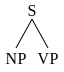

In [2]:
svgling.draw_tree(("S", "NP", "VP"))

As a shortcut, the outer bracketing here can be omitted:

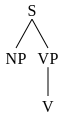

In [3]:
svgling.draw_tree("S", "NP", ("VP", "V"))

Multi-line nodes are generally possible. Simply provide the node as a string that includes `\n` where a linebreak is desired. The next example, a more complex tree with multi-line leaf nodes, also shows how to get the leaf nodes to be lined up with each other. (This tree is from Carnie 2013, *Syntax: a generative introduction (3rd ed.)*, p. 93.)

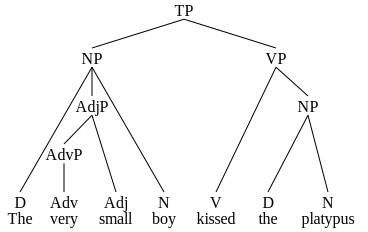

In [4]:
svgling.draw_tree("TP", ("NP", "D\nThe", ("AdjP", ("AdvP", "Adv\nvery"), "Adj\nsmall"), "N\nboy"), ("VP", "V\nkissed", ("NP", "D\nthe", "N\nplatypus")), leaf_nodes_align=True)

## More advanced tricks

Next is an even more complex example, a typical tree for Quantifier Raising in the Heim & Kratzer 1998 ("Semantics in Generative Grammar") style, illustrating movement arrows and tree annotation from the `svgling.figure` module.

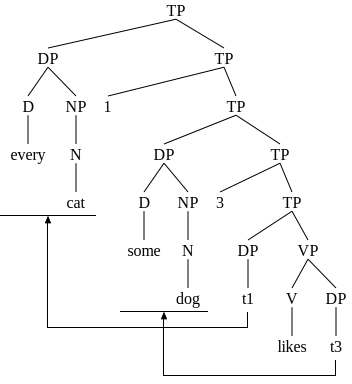

In [5]:
t2 = ("TP", ("DP", ("D", "every"), ("NP", ("N", "cat"))),
           ("TP", "1", ("TP", ("DP", ("D", "some"), ("NP", ("N", "dog"))),
                     ("TP", "3", ("TP", ("DP", "t1"), ("VP", ("V", "likes"), ("DP", "t3")))))))
out = svgling.draw_tree(t2)
out.movement_arrow((1,1,1,1,0), (0,))
out.underline_constituent((0,))
out.movement_arrow((1,1,1,1,1,1), (1,1,0))
out.underline_constituent((1,1,0))
out

# Integration with other packages

## Exporting to raster formats

The `svgling` packages supports exporting to raster formats via `cairosvg`. Convenience wrappers are provided via `svgling.util`, and the full `cairosvg` api can be used as well. See the manual for more details, but here is an example of one of `t3` as a png:

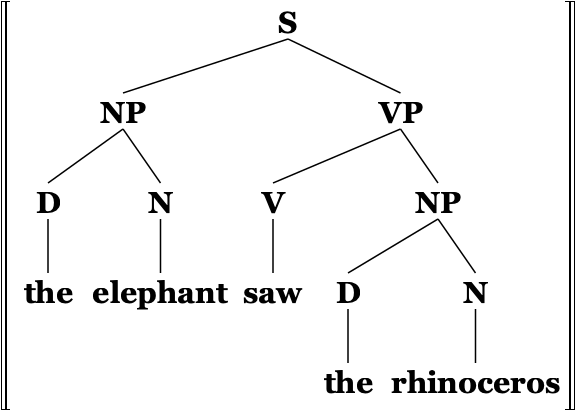

In [30]:
import cairosvg # this cell needs cairosvg in order to run
import svgling.utils, svgling.semantics
from IPython.display import Image
t = svgling.semantics.DoubleBrackets(t3)
Image(svgling.utils.svg2png(t, scale=1.5))

## Integration with NLTK

The `svgling` package is well-integrated with the `nltk` (https://www.nltk.org/) package. This package uses `svgling` for rendering of `nltk.tree.Tree` objects in Jupyter by default (using it to implement a `_repr_svg_()`, and `svgling` supports `nltk.tree.Tree` objects in any context where a tree can be provided.

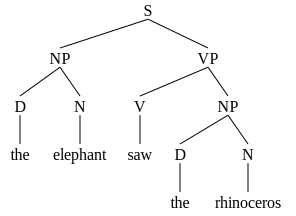

In [6]:
import nltk
t3 = nltk.Tree.fromstring("(S (NP (D the) (N elephant)) (VP (V saw) (NP (D the) (N rhinoceros))))")
t3

For more complex styling, supply a `nltk.tree.Tree` object directly to `draw_tree`:

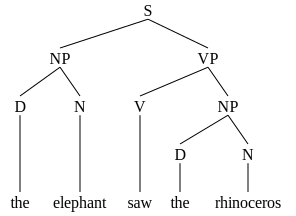

In [7]:
svgling.draw_tree(t3, leaf_nodes_align=True)

Other parts of `svgling` support `Tree`s as well, in particular, the `svgling.figure` utility classes.

# Tree formatting basics

There are various formatting options that can affect how trees are rendered. This document gives a sample; see the manual for a full list.

Because `svgling` does (for now) only single-pass rendering, with no javascript, some of the advanced spacing options may occasionally involve a certain amount of heuristic adjustment (because it is impossible to know exact text sizes before actually rendering them to a device). Please let me know if you find spacing bugs and I'll try to address them.

The simplest way to pass options is via named parameters to `draw_tree`. You can also create an `svling.core.TreeOptions` object and set parameters directly on this, and also set parameters on the `TreeOptions` instance `svgling.core.default_options`, which is used if no options at all are provided.

`t0` and `t1` are two somewhat more interesting trees, defined via python lists. Below I give various rendering options demonstrated on those trees.

In [8]:
t0 = ("S", ("NP", "D", "N"), ("VP", "V", ("NP", "D", "N")))
t1 = ("S", ("NP", ("D", "the"), ("N", "rhinoceros")), ("VP", ("V", "saw"), ("NP", ("D", "the"), ("N", "elephant"))))

Here are the default settings, which use text-width-based spacing (`HorizOptions.TEXT`):

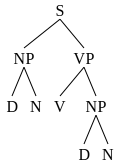

In [9]:
svgling.draw_tree(t0)

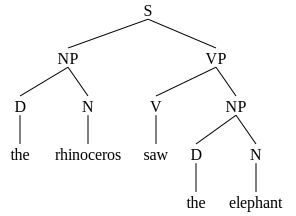

In [10]:
svgling.draw_tree(t1)

## Tree layouts and spacing

Here are the two above trees rendered using even spacing. Without manual adjustment, this may cut off longer words, but it can look better for abstract trees with similar-width leaf nodes.

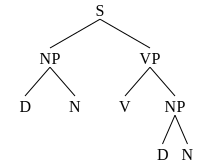

In [11]:
svgling.draw_tree(t0, horiz_spacing=svgling.core.HorizOptions.EVEN, leaf_padding=4)

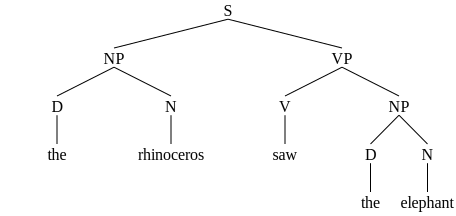

In [12]:
svgling.draw_tree(t1, horiz_spacing=svgling.core.HorizOptions.EVEN, leaf_padding=6)

By default, leaf node height will be determined by the depth of the leaf node. It is possible to set leaf nodes to all align with the lowest leaf node in the tree:

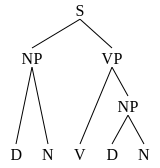

In [13]:
svgling.draw_tree(t0, leaf_nodes_align=True, leaf_padding=3)

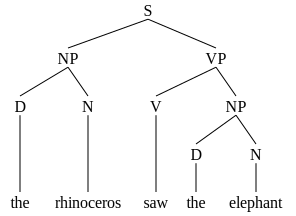

In [14]:
svgling.draw_tree(t1, leaf_nodes_align=True)

Sometimes it is helpful to, in combination with `leaf_nodes_align`, set `descend_direct` to be `False`, which draws the line to leaf nodes in a different way:

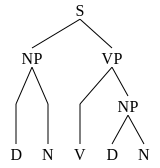

In [15]:
svgling.draw_tree(t0, leaf_nodes_align=True, leaf_padding=3, descend_direct=False)

Vertical spacing can be customized with `distance_to_daughter`, which stores a value in `em`s. Values less than about 0.5 are not recommended and will usually result in rendering problems. Here is an example of an extremely compact tree:

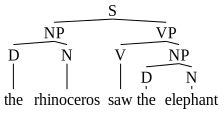

In [16]:
svgling.draw_tree(t1, leaf_nodes_align=True, distance_to_daughter=0.4, leaf_padding=0.2)

## Font and node formatting

The package supports various node styling, both globally and per-node. For fonts, by default `svgling` will use times with some serif as a backup (this is for very broad browser compatibility). To change the font, you can supply a css-formatted string to the relevant tree option; the default font is times with some serif as a backup (this is for very broad browser compatibility). This is specifically the css string:

```css
font-family: times, serif; font-weight:normal; font-style: normal;
```

I recommend supplying all of these values, as otherwise when the tree is embedded in an arbitrary document, context might impact the font choice in unexpected ways. Don't forget the trailing `;`. You can use the convenience function `svgling.core.cssfont` to generate css font strings, and for this function, only the first argument supplying a font family is required.

Keep in mind also that if you are sharing your document with others, this will be dependent on installed fonts for their svg viewer.

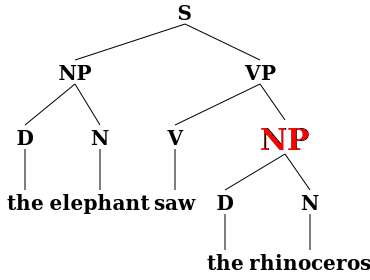

In [26]:
svgling.core.reset_defaults()
# equivalent to setting it to: "font-family: georgia, times, serif; font-weight: bold; font-style: oblique;"
svgling.core.default_options.font_style = svgling.core.cssfont("georgia, times, serif", weight="bold", style="oblique")
svgling.core.default_options.font_size = 20
out = svgling.draw_tree(t3)
out.set_node_style((1,1), font_size=30, text_color="red")
out

## Debug mode

Sometimes, if a tree is not rendering how you expect, it may be helpful to view it in debug mode; this draws an `em` grid along with boxes for each subtree to show how it is doing positioning. This is set with the `debug` value on options objects.

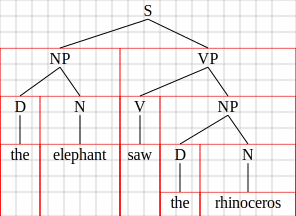

In [18]:
svgling.core.default_options = svgling.core.TreeOptions()
svgling.core.default_options.debug = True
t3

# Further customization and future directions

Because of the nature of SVG, many aspects of trees are very easy to customize, but also various things that would be nice to have are nonetheless extremely hard to do. Even things that aren't exposed in the `svgling` API may be pretty easy to do with some light under-the-hood customization of the tree rendering code. If you have specific requests, let me know.

Here are some possible future additions, to give a sample. Pull requests are welcome!
* labels along edges
* api for more fine=grained manual spacing adjustment
* better support for complex node contents
* support for linguistic diagrams from phonology and morphology. (There is already some limited support for semantics-related diagrams.)
* (harder) more automatic resizing of trees via Javascript
* (harder) put MathJax in nodes, perhaps using SVG `foreignObject`. Support `foreignObject` nodes in general.
* (very hard) allow interactive positioning of nodes or trees via javascript.
* (doable but a lot of work) dependency parsing trees